# Solutions to Problem Set 3

*Stats 507, Fall 2021*

Shihao Wu, PhD student

## imports 
The questions below will use the following imports.

In [196]:
import pandas as pd
import numpy as np
import sys
import os
from copy import deepcopy
import matplotlib.pyplot as plt

## Question 0 - RECS and Replicate Weights

In this problem set, you will analyze data from the 2009 and 2015 Residential Energy Consumpion Surveys RECS put out by the US Energy Information Agency. In this warm up question, you will:

* find URLs from which to download the data for subsequent questions,
* determine variables you will need by examining the codebooks, and
* familiarize yourself with the replicate weight method used for computing standard errors and constructing confidence intervals.

### Data Files

Find links to the 2009 and 2015 RECS microdata files and report them here. In the 2009 data year the replicate weights (see below) are distributed in a separate file. Find and report the link to that file as well.

**Solution:** The ULR links are here: [2009 (data)](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv), [2009 (relicate weights)](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv),    [2015](https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv). The ULRs are [https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv), [https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv),    [https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv](https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv), respectively.

### Variables

Using the codebooks for the assoicated data files, determine what variables you will need to answer the following question. Be sure to include variables like the unit id and sample weights.

> Estimate the average number of heating and cooling degree days for residences in each Census region for both 2009 and 2015.

**Solution:** The variables I need are:
1. 'DOEID': Unique identifier for each respondent
2. 'REGIONC': Census Region
3. 'NWEIGHT': Final sample weight
4. 'HDD65': Heating degree days in 2009, base temperature 65F
5. 'CDD65': Cooling degree days in 2009, base temperature 65F

### Weights and Replicate Weights

Residences participating in the RECS surveys are not an independent and identically distributed sample of residences from the population of all US residences in the survey years. Instead, a complex sampling procedure is used. The details of the sampling process are beyond the scope of this course and assignment. However, you do need to know that residences in the surveys are *weighted* and to make use of those weights in your solution. Moreover, these surveys include *balanced repeated replicate (brr) weights* to facilitate computation of standard errors and, in turn, construction of confidence intervals.

On the same page as the data, you will find a link explaining how to use the replicate weights. Report that link here; then, citing the linked document, briefly explain how the replicate weights are used to estimate standard errors for weighted point estimates. The *standard error of an estimator* is the *square root* of that estimator’s *variance*. Please note that I am asking you about the *standard error* and not the *relative* standard error. In your explanation please retype the key equation making sure to document what each variable in the equation is. Don’t forget to include the *Fay coefficient* and its value(s) for the specific replicate weights included with the survey data.

**Solution:** The link explanining how to use the replcate weightes i s here: [Using the 2015 microdata file to compute estimates and standard errors (RSEs).](https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf), the URL is [https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf](https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf). To cite the linked ducument, see the reference below. In order to estimate standard errors for weighted pointed estimates, the key equation to calculate the standard error is 
$$
    \widehat{\text{SE}}(\tilde{\theta})= \Biggl\{\frac{1}{R(1-\epsilon)^2}\sum_{i=1}^{R} (\hat{\theta}_r - \hat{\theta})^2\Biggr\}^{1/2}.
$$
where $R$ is the number of replicate subsamples, $\hat{\theta}$ is the full sample based estimator and $\hat{\theta}_{r}$ is estimated from the r-th replicate subsample by using replicate weights. $\varepsilon=0.5$.

#### Reference
[1] *Residential Energy Consumption Survey (RECS): Using the 2015 microdata file to compute estimates and standard errors (RSEs)*

## Question 1 - Data Preparation

In this question you will use Pandas to download, read, and clean the RECS data needed for subsequent questions. Use pandas to read data directly from the URLs you documented in the warmup when local versions of the files are not available. After download and/or clearning, write local copies of the datasets. Structure your code to use <code>exists</code> from the (built-in) <code>sys</code> module so the data are only downloaded when not already available locally.



In [106]:
# get current path
cur_path = sys.argv[0]
# check if files are in the current path, then download
if (os.path.exists(cur_path+'recs2009_public.csv') == False):
    recs2009 = pd.read_csv('https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv', 
                           sep=",", low_memory=False)
    recs2009.to_csv('recs2009_public.csv')

if (os.path.exists(cur_path+'recs2009_public_repweights.csv') == False):
    recs2009_weight = pd.read_csv('https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv', 
                                  sep=",", low_memory=False)
    recs2009_weight.to_csv('recs2009_public_repweights.csv')

if (os.path.exists(cur_path+'recs2015_public_v4.csv') == False):
    recs2015 = pd.read_csv('https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv', 
                           sep=",", low_memory=False)
    recs2015.to_csv('recs2015_public_v4.csv')


**Note: In case that changing the downloaded data might cause some loss in information, I save the original data and process it each time using it.**

### part a)

Separately for 2009 and 2015, construct datasets containing just the minimal necessary variables identified in the warmup, excluding the replicate weights. Choose an appropriate format for each of the remaining columns, particularly by creating categorical types where appropriate.

In [108]:
# read the data locally and choose appropriate column names
recs2009 = pd.read_csv('recs2009_public.csv', sep=",", 
                       low_memory=False)[['DOEID','REGIONC','HDD65','CDD65']]
recs2009 = recs2009.set_axis(["id", "region", "heat_days" , 
                            "cold_days"], axis=1)
recs2015 = pd.read_csv('recs2015_public_v4.csv', sep=",", 
                       low_memory=False)[['DOEID','REGIONC','HDD65','CDD65']]
recs2015 = recs2015.set_axis(["id", "region", "heat_days" , 
                            "cold_days"], axis=1)
# set region as categorical
recs2009['region'] = pd.Categorical(recs2009['region'].replace({1: 'Northeast',
                                                                2: 'Midwest',
                                                                3: 'South',
                                                                4: 'West'}))
recs2015['region'] = pd.Categorical(recs2015['region'].replace({1: 'Northeast',
                                                                2: 'Midwest',
                                                                3: 'South',
                                                                4: 'West'}))

# set id as string
recs2009 = recs2009.astype({'id': 'string'})
recs2015 = recs2015.astype({'id': 'string'})

print(recs2009.dtypes)
print(recs2015.dtypes)

id             string
region       category
heat_days       int64
cold_days       int64
dtype: object
id             string
region       category
heat_days       int64
cold_days       int64
dtype: object


### part b)

Separatley for 2009 and 2015, construct datasets containing just the unique case ids and the replicate weights (*not* the primary final weight) in a “long” format with one weight and residence per row.

In [109]:
# read the data locally
col_names09 = ['DOEID']
col_names15 = ['DOEID']
for i in range(1,245):
    col_names09.append('brr_weight_{}'.format(str(i)))
for i in range(1,97):
    col_names15.append('BRRWT{}'.format(str(i)))
recs2009_w = pd.read_csv('recs2009_public_repweights.csv',sep=",")[col_names09]
recs2015_w = pd.read_csv('recs2015_public_v4.csv',sep=",")[col_names15]


# rename and create the 'long' format for 2009
recs2009_w.rename(columns={'DOEID':'id'}, inplace=True)
recs2009_rw = recs2009_w.set_index(["id"])
recs2009_rw.columns = [244 * ["brr_weight"], [str(x) for x in range(1, 245)]]
recs2009_rw.columns.names = (None, 'times')
recs2009_rw = recs2009_rw.stack()
recs2009_rw.reset_index(inplace=True)
recs2009_rw = recs2009_rw.drop(["times"], axis=1)

# rename and create the 'long' format for 2015
recs2015_w.rename(columns={'DOEID':'id'}, inplace=True)
recs2015_rw = recs2015_w.set_index(["id"])
recs2015_rw.columns = [96 * ["brr_weight"], [str(x) for x in range(1, 97)]]
recs2015_rw.columns.names = (None, 'times')
recs2015_rw = recs2015_rw.stack()
recs2015_rw.reset_index(inplace=True)
recs2015_rw = recs2015_rw.drop(["times"], axis=1)

In [110]:
recs2009_rw

,id,brr_weight
0,1,3628.305158
1,1,1273.009862
2,1,1223.161753
3,1,1212.644165
4,1,3999.669668
...,...,...
2948247,12083,4012.317688
2948248,12083,11337.171910
2948249,12083,3815.849990
2948250,12083,11570.995460


In [111]:
recs2015_rw

,id,brr_weight
0,10001,16555.311270
1,10001,17569.634170
2,10001,16620.985010
3,10001,18815.840710
4,10001,5660.359821
...,...,...
545851,15686,19431.499680
545852,15686,16265.331380
545853,15686,48271.650850
545854,15686,18825.206440


## Question 2 - Construct and report the estimates

### part a)

Estimate the average number of heating and cooling degree days for residences in each Census region for both 2009 and 2015. You should construct both point estimates (using the wegihts) and 95% confidece intervals (using standard errors estiamted with the repliacte weights). Report your results in a nicely formatted table.

For this question, you should use pandas DataFrame methods wherever possible. Do not use a module specifically supporting survey weighting.

In [197]:
# read and merge the data
recs2009 = pd.read_csv('recs2009_public.csv', sep=",", low_memory=False)[['DOEID','REGIONC','HDD65','CDD65']]
recs2009 = recs2009.set_axis(["id", "region", "heat days" , 
                            "cold days"], axis=1)
recs2009_w = pd.read_csv('recs2009_public_repweights.csv', sep=",", low_memory=False)
recs2009_w.rename(columns={'NWEIGHT':'nweight'}, inplace=True)
recs2015 = pd.read_csv('recs2015_public_v4.csv', sep=",", low_memory=False)[['DOEID','REGIONC','HDD65','CDD65','NWEIGHT']]
recs2015 = recs2015.set_axis(["id", "region", "heat days" , 
                            "cold days", "nweight"], axis=1)
recs09 = pd.concat([recs2009, recs2009_w], axis=1)
# read the weights in 2015
col_names15 = ['DOEID']
for i in range(1,97):
    col_names15.append('BRRWT{}'.format(str(i)))
recs2015_w = pd.read_csv('recs2015_public_v4.csv',sep=",")[col_names15]
recs15 = pd.concat([recs2015, recs2015_w], axis=1)

# set region as categorical
recs09['region'] = pd.Categorical(recs09['region'].replace({1: 'Northeast',
                                                                2: 'Midwest',
                                                                3: 'South',
                                                                4: 'West'}))
recs15['region'] = pd.Categorical(recs15['region'].replace({1: 'Northeast',
                                                                2: 'Midwest',
                                                                3: 'South',
                                                                4: 'West'}))
# rename replicate weights
for name in recs15.columns:
    if name[:5] == "BRRWT":
        recs15.rename(columns={name: "brr_weight{}".format(name[5:len(name)])},
                      inplace=True)
for name in recs09.columns:
    if name[:10] == "brr_weight":
        recs09.rename(columns={name: "brr_weight{}".format(name[11:len(name)])}, 
                       inplace=True)

## functions for mean and se
def mean_est(data, index, weight):
    """
    The function returns grouped mean in data.
    
    Parameters
    ----------
    data : data frame
        The data frame where the data of interests are in.
    index : categorical.
        The index used to group the observations.
    weight : string
        The name of the kind of weight being used in the analysis

    Returns
    -------
    The grouped mean as a data frame.

    """
    result_mean = data.groupby("region").apply(lambda x: (x[index] * x[weight]).sum() 
                                         / x[weight].sum())
    result = pd.DataFrame( 
        {
            index + " mean" : result_mean
        }
    )
    return result


def se_est(data, mean, index, weights):
    """
    The function returns grouped standard error in data.
    
    Parameters
    ----------
    data : data frame
        The data frame where the data of interests are in.
    mean : data frame
        Grouped mean of the data.
    index : categorical.
        The index used to group the observations.
    weights : int
        The number of types of replicate weight.

    Returns
    -------
    The grouped standard error as a data frame.

    """
    weight = "brr_weight1"
    df =  mean_est(data, index, weight)
    for i in range(2, weights + 1):
        weight = "brr_weight{}".format(i)
        df_new = mean_est(data, index, weight)
        df = pd.concat([df, df_new], axis=1)
    df_copy = deepcopy(df)
    for i in range(weights):
        df_copy.iloc[:, i] = (df.iloc[:,i] - mean[index + " mean"]) ** 2
    result_se = df_copy.apply(lambda x: (x.mean() * 4) ** 0.5, axis=1)
    result = pd.DataFrame( 
        {
            index + " se" : result_se
        }
    )
    return result

## The means
# 09 heat days
h09_mean = mean_est(recs09, "heat days", "nweight")

# 15 heat days
h15_mean = mean_est(recs15, "heat days", "nweight")

# 09 cold days
c09_mean = mean_est(recs09, "cold days", "nweight")

# 15 cold days
c15_mean = mean_est(recs15, "cold days", "nweight")

mean_09 = pd.concat([h09_mean, c09_mean], axis=1)
mean_15 = pd.concat([h15_mean, c15_mean], axis=1)

## The standard errors
# 09 heat days
h09_se = se_est(recs09, h09_mean, "heat days", 244)

# 15 heat days
h15_se = se_est(recs15, h15_mean, "heat days", 96)

# 09 cold days
c09_se = se_est(recs09, c09_mean, "cold days", 244)

# 15 cold days
c15_se = se_est(recs15, c15_mean, "cold days", 96)

se_09 = pd.concat([h09_se, c09_se], axis=1)
se_15 = pd.concat([h15_se, c15_se], axis=1)

## The final tables
# 09
table_09 = deepcopy(mean_09)
low_h09 = mean_09["heat days mean"] - se_09["heat days se"] * 1.96
high_h09 = mean_09["heat days mean"] + se_09["heat days se"] * 1.96
low_c09 = mean_09["cold days mean"] - se_09["cold days se"] * 1.96
high_c09 = mean_09["cold days mean"] + se_09["cold days se"] * 1.96
table_09["heat days 95% CI"] = ['[{},{}]'.format(round(low_h09[0],2),round(high_h09[0],2)),
                                '[{},{}]'.format(round(low_h09[1],2),round(high_h09[1],2)),
                               '[{},{}]'.format(round(low_h09[2],2),round(high_h09[2],2)),
                               '[{},{}]'.format(round(low_h09[3],2),round(high_h09[3],2))]
table_09["cold days 95% CI"] = ['[{},{}]'.format(round(low_c09[0],2),round(high_c09[0],2)),
                                '[{},{}]'.format(round(low_c09[1],2),round(high_c09[1],2)),
                               '[{},{}]'.format(round(low_c09[2],2),round(high_c09[2],2)),
                               '[{},{}]'.format(round(low_c09[3],2),round(high_c09[3],2))]

# 15
table_15 = deepcopy(mean_15)
low_h15 = mean_15["heat days mean"] - se_15["heat days se"] * 1.96
high_h15 = mean_15["heat days mean"] + se_15["heat days se"] * 1.96
low_c15 = mean_15["cold days mean"] - se_15["cold days se"] * 1.96
high_c15 = mean_15["cold days mean"] + se_15["cold days se"] * 1.96
table_15["heat days 95% CI"] = ['[{},{}]'.format(round(low_h15[0],2),round(high_h15[0],2)),
                                '[{},{}]'.format(round(low_h15[1],2),round(high_h15[1],2)),
                               '[{},{}]'.format(round(low_h15[2],2),round(high_h15[2],2)),
                               '[{},{}]'.format(round(low_h15[3],2),round(high_h15[3],2))]
table_15["cold days 95% CI"] = ['[{},{}]'.format(round(low_c15[0],2),round(high_c15[0],2)),
                                '[{},{}]'.format(round(low_c15[1],2),round(high_c15[1],2)),
                               '[{},{}]'.format(round(low_c15[2],2),round(high_c15[2],2)),
                               '[{},{}]'.format(round(low_c15[3],2),round(high_c15[3],2))]





In [198]:
mean_09

,heat days mean,cold days mean
region,,
Midwest,6325.337056,660.888380
Northeast,5700.988118,680.715128
South,2696.667554,2207.728366
West,3259.641522,1328.642134


In [199]:
mean_15

,heat days mean,cold days mean
region,,
Midwest,5785.490456,956.074312
Northeast,5695.673003,983.919861
South,2211.879901,2639.850988
West,2814.830692,1576.774204


In [200]:
se_09

,heat days se,cold days se
region,,
Midwest,46.722477,14.743447
Northeast,35.095709,10.506295
South,41.311065,29.123216
West,85.263525,29.804705


In [201]:
se_15

,heat days se,cold days se
region,,
Midwest,76.894846,31.454351
Northeast,83.469165,33.168440
South,79.408157,58.750608
West,96.837108,101.904670


In [202]:
table_09

,heat days mean,cold days mean,heat days 95% CI,cold days 95% CI
region,,,,
Midwest,6325.337056,660.888380,"[6233.76,6416.91]","[631.99,689.79]"
Northeast,5700.988118,680.715128,"[5632.2,5769.78]","[660.12,701.31]"
South,2696.667554,2207.728366,"[2615.7,2777.64]","[2150.65,2264.81]"
West,3259.641522,1328.642134,"[3092.53,3426.76]","[1270.22,1387.06]"


In [203]:
table_15

,heat days mean,cold days mean,heat days 95% CI,cold days 95% CI
region,,,,
Midwest,5785.490456,956.074312,"[5634.78,5936.2]","[894.42,1017.72]"
Northeast,5695.673003,983.919861,"[5532.07,5859.27]","[918.91,1048.93]"
South,2211.879901,2639.850988,"[2056.24,2367.52]","[2524.7,2755.0]"
West,2814.830692,1576.774204,"[2625.03,3004.63]","[1377.04,1776.51]"


### part b)

Using the estimates and standard errors from part a, estimate the change in heating and cooling degree days between 2009 and 2015 for each Census region. In constructing interval estimates, use the facts that the estimators for each year are independent and that,
$$
      \text{var}(\hat{\theta}_0+ \hat{\theta}_1) = \text{var}(\hat{\theta}_0) + \text{var} (\hat{\theta}_1),
$$

when the estimators θ̂ 0 and θ̂ 1 are independent.

Once again, report your results in a nicely formatted table.

In [204]:
mean_dif = (mean_15[['heat days mean', 'cold days mean']] - 
                              mean_09[['heat days mean', 'cold days mean']])
se_dif = (se_09 ** 2 + se_15 ** 2) ** .5
dif = pd.concat([mean_dif, se_dif], axis=1)


#df_2b = df_est_2b[index3]
#df_2b.columns = [index1, 2 * index2]
#df_2b


low_hd = dif["heat days mean"] - dif["heat days se"] * 1.96
high_hd = dif["heat days mean"] + dif["heat days se"] * 1.96
low_cd = dif["cold days mean"] - dif["cold days se"] * 1.96
high_cd = dif["cold days mean"] + dif["cold days se"] * 1.96
dif["heat days 95% CI"] = ['[{},{}]'.format(round(low_hd[0],2),round(high_hd[0],2)),
                                '[{},{}]'.format(round(low_hd[1],2),round(high_hd[1],2)),
                               '[{},{}]'.format(round(low_hd[2],2),round(high_hd[2],2)),
                               '[{},{}]'.format(round(low_hd[3],2),round(high_hd[3],2))]
dif["cold days 95% CI"] = ['[{},{}]'.format(round(low_cd[0],2),round(high_c[0],2)),
                                '[{},{}]'.format(round(low_cd[1],2),round(high_cd[1],2)),
                               '[{},{}]'.format(round(low_cd[2],2),round(high_cd[2],2)),
                               '[{},{}]'.format(round(low_cd[3],2),round(high_cd[3],2))]

dif = dif[['heat days mean', 'cold days mean', 
           'heat days 95% CI', 'cold days 95% CI']]
dif = dif.set_axis(["average change in heat days", "average change in cool days", 
                    "95% CI of change in heat days",
                    "95% CI of change in cool days"], axis=1)

dif


,average change in heat days,average change in cool days,95% CI of change in heat days,95% CI of change in cool days
region,,,,
Midwest,-539.846600,295.185932,"[-716.2,-363.49]","[227.1,-227.1]"
Northeast,-5.315115,303.204733,"[-182.79,172.16]","[235.01,371.4]"
South,-484.787653,432.122622,"[-660.23,-309.35]","[303.6,560.65]"
West,-444.810830,248.132070,"[-697.7,-191.92]","[40.03,456.23]"


## Question 3

Use pandas and/or matplotlib to create visualizations for the results reported as tables in parts a and b of question 2. As with the tables, your figures should be “polished” and professional in appearance, with well-chosen axis and tick labels, English rather than <code>code_speak</code>, etc. Use an adjacent markdown cell to write a caption for each figure.

#### a) Compare heating days and cooling days between 2009 and 2015

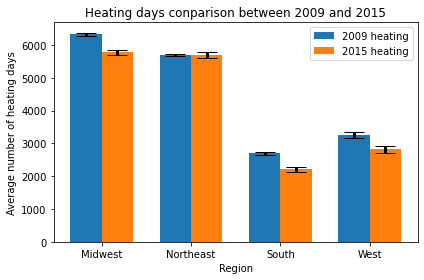

In [205]:
x = np.arange(4)  # the label locations
width = 0.35  # the width of the bars

labels = ['Midwest', 'Northeast', 'South', 'West']

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_09['heat days mean'], 
                width = width,
                yerr=(se_09['heat days se']), 
                error_kw = dict(elinewidth=3, ecolor='black', capsize=10),
                label='2009 heating')
rects2 = ax.bar(x + width/2, mean_15['heat days mean'],
                width = width,
                yerr=(se_15['heat days se']), 
                error_kw = dict(elinewidth=3, ecolor='black', capsize=10),
                label='2015 heating')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Region')
ax.set_ylabel('Average number of heating days')
ax.set_title('Heating days conparison between 2009 and 2015')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

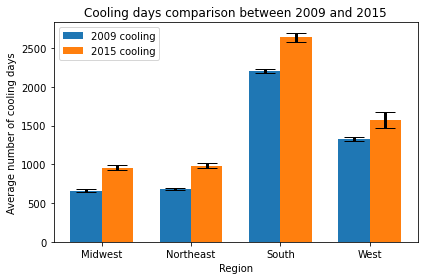

In [206]:
x = np.arange(4)  # the label locations
width = 0.35  # the width of the bars

labels = ['Midwest', 'Northeast', 'South', 'West']

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_09['cold days mean'], 
                width = width,
                yerr=(se_09['cold days se']), 
                error_kw = dict(elinewidth=3, ecolor='black', capsize=10),
                label='2009 cooling')
rects2 = ax.bar(x + width/2, mean_15['cold days mean'],
                width = width,
                yerr=(se_15['cold days se']), 
                error_kw = dict(elinewidth=3, ecolor='black', capsize=10),
                label='2015 cooling')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Region')
ax.set_ylabel('Average number of cooling days')
ax.set_title('Cooling days comparison between 2009 and 2015')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

#### b) Changes from 2009 to 2015 on heating days and cooling days

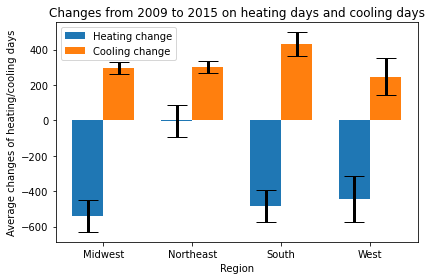

In [207]:
x = np.arange(4)  # the label locations
width = 0.35  # the width of the bars

labels = ['Midwest', 'Northeast', 'South', 'West']

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_dif['heat days mean'], 
                width = width,
                yerr=(se_dif['heat days se']), 
                error_kw = dict(elinewidth=3, ecolor='black', capsize=10),
                label='Heating change')
rects2 = ax.bar(x + width/2, mean_dif['cold days mean'],
                width = width,
                yerr=(se_dif['cold days se']), 
                error_kw = dict(elinewidth=3, ecolor='black', capsize=10),
                label='Cooling change')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Region')
ax.set_ylabel('Average changes of heating/cooling days')
ax.set_title('Changes from 2009 to 2015 on heating days and cooling days')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()